Exercise 1

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloading required resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Defining the sentences
pair1 = ["What you do defines you", "Your deeds define you"]

# Function for preprocessing and converting to set of lemmatized words
def preprocess(sentence):
    tokens = word_tokenize(sentence.lower())
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    return set(lemmatized)


In [3]:
# Preprocessing both sentences
set1 = preprocess(pair1[0])
set2 = preprocess(pair1[1])

# Computing Jaccard similarity
jaccard_index = len(set1.intersection(set2)) / len(set1.union(set2))
print(f"Jaccard Similarity Index for pair1: {jaccard_index:.4f}")

Jaccard Similarity Index for pair1: 0.1429


Exercise 2

In [4]:
import nltk
from nltk.metrics import edit_distance



In [5]:
# given sentences
s1 = "I cannot believe what he said"
s2 = "I believe it is not what he said"

# Computing Levenshtein distance
distance = edit_distance(s1, s2)
print(f"Levenshtein Distance: {distance}")

Levenshtein Distance: 15


Exercise 3

In [26]:
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
import string

# Downloading required NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Reading the text file
with open("Europe_Covid.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [25]:
# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# Processing the text
words = preprocess(text)

In [24]:
# Building co-occurrence matrix with window size of 4
window_size = 4
co_occur = defaultdict(lambda: defaultdict(int))

for i, word in enumerate(words):
    start = max(0, i - window_size)
    end = min(len(words), i + window_size + 1)
    for j in range(start, end):
        if j != i and words[j] != word:
            co_occur[word][words[j]] += 1

In [22]:
# Function for getting similar words
def get_similar_words(target_word, top_n=5):
    if target_word not in co_occur:
        return []
    sorted_words = sorted(co_occur[target_word].items(),
                         key=lambda x: x[1], reverse=True)
    return [word for word, count in sorted_words[:top_n]]

In [23]:
# Getting similar words
gov_similar = get_similar_words("government")
curfew_similar = get_similar_words("curfew")

print("Words similar to 'government':", gov_similar)
print("Words similar to 'curfew':", curfew_similar)

Words similar to 'government': ['health', 'center', 'macron', 'added', 'aims']
Words similar to 'curfew': ['region', 'andalusia', 'country', 'subject', 'nighttime']


Exercise 4


In [14]:
from textblob import TextBlob

# Loading the text file
with open('Europe_Covid.txt', 'r') as file:
    text = file.read()


In [15]:
# Creating a TextBlob object
blob = TextBlob(text)

# Computing sentiment (polarity and subjectivity)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity



In [9]:
print(f"Sentiment Polarity: {polarity}")
print(f"Sentiment Subjectivity: {subjectivity}")

Sentiment Polarity: 0.04992382294707877
Sentiment Subjectivity: 0.3476432095036746


Exercise 5



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


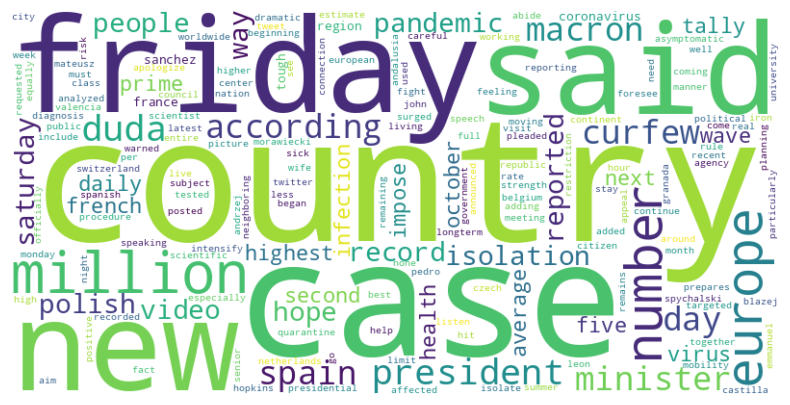

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the text file
with open('Europe_Covid.txt', 'r') as file:
    text = file.read()

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess the text: tokenize, remove stopwords, and lemmatize
def preprocess(text):
    tokens = word_tokenize(text.lower())
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(lemmatized)

# Preprocess the entire text
processed_text = preprocess(text)

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Exercise 6

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize

# Reading the file
with open("Europe_Covid.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Splitting into sentences
sentences = sent_tokenize(text)



In [32]:
# Calculating TF-IDF scores
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)

# Getting sentence scores and sort them
sentence_scores = X.sum(axis=1).A1  # Convert to flat array
top_sentence_indices = sentence_scores.argsort()[-5:][::-1]  # Get top 5 indices

# Extracting top sentences
summary = [sentences[i].strip() for i in top_sentence_indices]

# Printing results
print("=== Extractive Summary (5 key sentences) ===")
for i, sentence in enumerate(summary, 1):
    print(f"{i}. {sentence}")

=== Extractive Summary (5 key sentences) ===
1. The five countries with the highest rate of infection worldwide are all in Europe, according to Johns Hopkins University's latest moving averages, as analyzed by CNN.The worst-hit nations are the Czech Republic, Belgium, the Netherlands, Switzerland and France.In all five countries, the number of new infections has surged since the beginning of October.
2. European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class.
3. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday.
4. "When I listen to the scientists, and the Scientific Council, we foresee [living with the virus] at best until next summer," Macron said, speaking during a visit to a health center.
5. Spain's Prime Minister Pedro Sanchez pleaded with the public to limit 